In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer 
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [2]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)

## Data Cleaning
This will further clean the labelled dataset to get ready for exploratory analysis.<br/>
Steps include:
<ol>
    <li>Tokenize text into words.</li>
    <li>Make all words lowercase.</li>
    <li>Remove punctuation and stopwords.</li>
</ol>

Future steps will be taken when getting ready for machine learning, including splitting data into test and train sets. 

Trying something different. Rather than manually curating data, just use all posts from PCOS vs endo subreddits.

In [3]:
endometriosis_sub_posts = pd.read_csv('../data/endometriosis_sub_data.csv')
endometriosis_com_posts = pd.read_csv('../data/endometriosis_comment_data.csv')
endo_sub_posts = pd.read_csv('../data/Endo_sub_data.csv')
endo_com_posts = pd.read_csv('../data/Endo_comment_data.csv')
endo_posts = pd.concat([endometriosis_sub_posts, endometriosis_com_posts, endo_sub_posts, endo_com_posts])
endo_posts = endo_posts.loc[~endo_posts['text'].isna()].reset_index(drop=True)

pcos_sub_posts = pd.read_csv('../data/PCOS_sub_data.csv')
pcos_com_posts = pd.read_csv('../data/PCOS_comment_data.csv')
pcos_posts = pd.concat([pcos_sub_posts, pcos_com_posts])
pcos_posts = pcos_posts.loc[~pcos_posts['text'].isna()].reset_index(drop=True)

In [4]:
stop_words = stopwords.words('english')
stop_words.extend(list(STOPWORDS))
more_stopwords = ['endo','endometriosis','pcos','polycystic','also','one','time','even','symptom','symptoms','know',
                  'like','think','though','really','would','still','going','thing','doctor','get',"i'm","i've",'said',
                  'want','told','could','thought','lot','that','since','say','thank']
stop_words.extend(more_stopwords)
stop_words = set(stop_words)

## Exploratory Anaylsis

In [5]:
print('There are %d endometriosis-related posts.' %len(endo_posts))
print('There are %d PCOS-related posts.' %len(pcos_posts))

There are 39464 endometriosis-related posts.
There are 37204 PCOS-related posts.


In [6]:
def get_word_frequencies(text):
    words = word_tokenize(text.lower())
    # thought about stemming words here?
    filtered_words = [word for word in words if word not in stop_words]
    filtered_words = [word for word in filtered_words if word.isalpha()]
    counts = Counter(filtered_words)
    return counts

In [7]:
endo_words = ''.join(endo_posts['text'].values.tolist())
endo_counts = get_word_frequencies(endo_words)

In [8]:
pcos_words = ''.join(pcos_posts['text'].values.tolist())
pcos_counts = get_word_frequencies(pcos_words)

### Most Common Words

most_common = dict(endo_counts.most_common(20))

plt.figure(figsize = (15,10))
plt.bar(most_common.keys(), most_common.values())
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in the Endometriosis Posts')
plt.savefig('../results/images/most_common_endo.png', bbox_inches='tight')
plt.show()

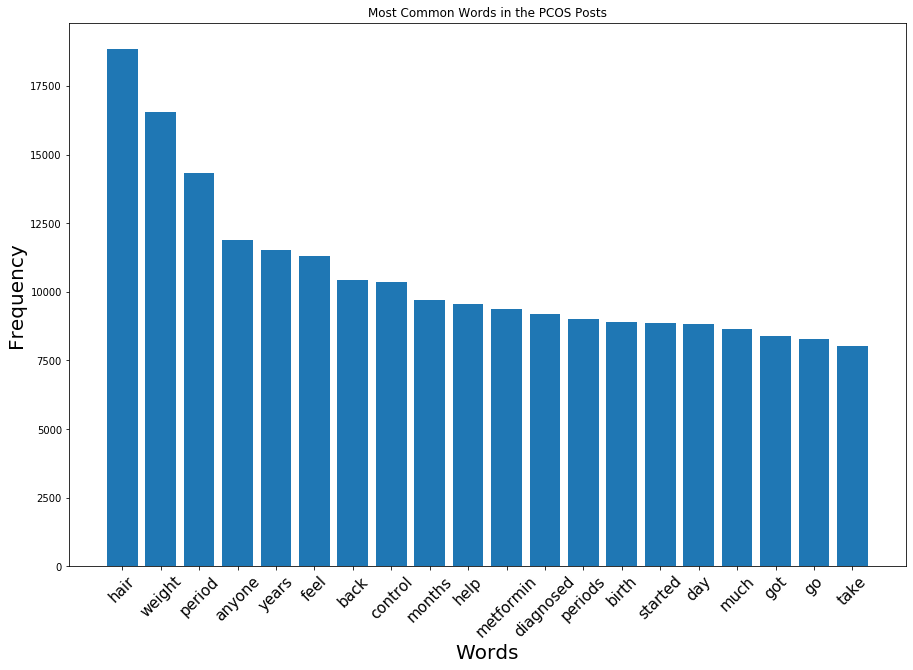

In [10]:
most_common = dict(pcos_counts.most_common(20))

plt.figure(figsize = (15,10))
plt.bar(most_common.keys(), most_common.values())
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in the PCOS Posts')
# plt.savefig('../images/most_common_pcos.png', bbox_inches='tight')
plt.show()

The endometriosis posts are dominated by the word "pain." However, the PCOS posts have less of a gap between their first and second most common words. The words seen are those expected, as women with endometriosis suffer from debilitating pain and often have surgery. Women with PCOS experience hair loss and weight gain more often.

### Length of Posts

In [11]:
endo_len = [len(post) for post in endo_posts['text'].values]
pcos_len = [len(post) for post in pcos_posts['text'].values]

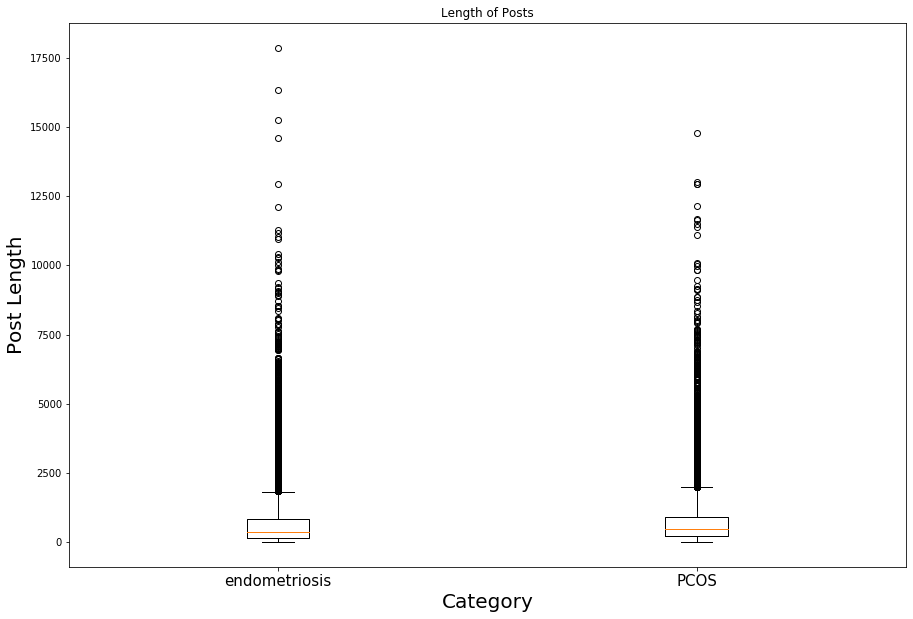

In [12]:
lengths = np.array([endo_len,pcos_len])
plt.figure(figsize = (15,10))
plt.boxplot(lengths)
plt.xticks(ticks=[1,2], labels=['endometriosis','PCOS'])
plt.xlabel('Category')
plt.ylabel('Post Length')
plt.title('Length of Posts')
# plt.savefig('../images/post_lengths.png', bbox_inches='tight')
plt.show()

The lengths of the posts are very similar between each category.

### Word Cloud

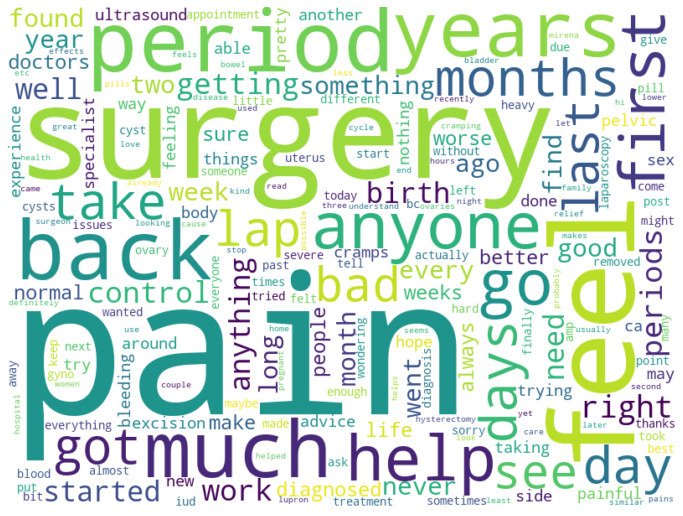

In [13]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=600)
wordcloud.generate_from_frequencies(endo_counts)
# wordcloud.to_file('../images/endo_word_cloud.png')
plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

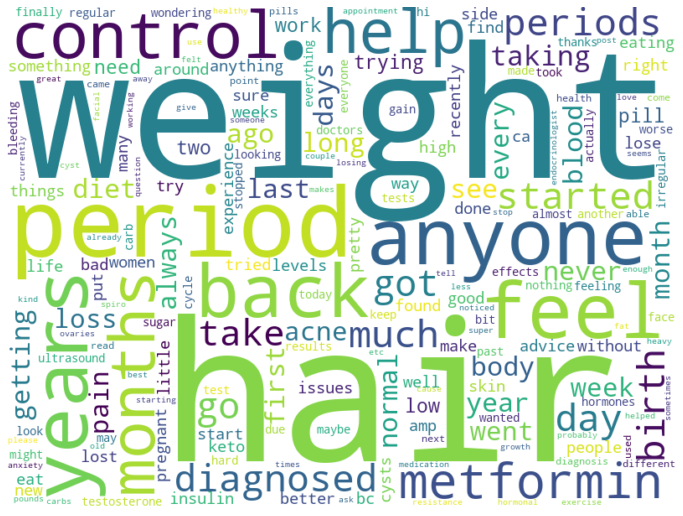

In [14]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=600)
wordcloud.generate_from_frequencies(pcos_counts)
# wordcloud.to_file('../images/pcos_word_cloud.png')
plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()